In [2]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

RANDOM_SEED = 42

In [3]:
dataset = r'keypoint_logs.csv'
model_save_path = r'keypoint_classifier_rf.joblib'

In [4]:
NUM_CLASSES = 8

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, 43)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [6]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
joblib.dump(rf_model, model_save_path)

['keypoint_classifier_rf.joblib']

In [8]:
predict_result = rf_model.predict(np.array([X_test[0]]))
print(predict_result)

[0]


In [9]:
# Model evaluation
y_pred = rf_model.predict(X_test)
print("Accuracy:", np.mean(y_pred == y_test))

Accuracy: 0.996661101836394


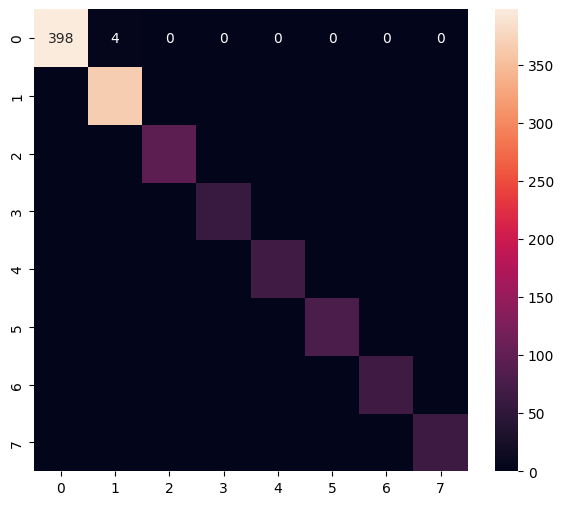

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       402
           1       0.99      1.00      0.99       366
           2       1.00      1.00      1.00        95
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        67
           5       1.00      1.00      1.00        78
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00        64

    accuracy                           1.00      1198
   macro avg       1.00      1.00      1.00      1198
weighted avg       1.00      1.00      1.00      1198



In [10]:
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))

print_confusion_matrix(y_test, y_pred)

In [16]:
data_row = '0.0,0.0,-0.19343065693430658,-0.04744525547445255,-0.36496350364963503,-0.21532846715328466,-0.4708029197080292,-0.3467153284671533,-0.572992700729927,-0.4124087591240876,-0.26277372262773724,-0.48905109489051096,-0.31386861313868614,-0.6423357664233577,-0.291970802919708,-0.5401459854014599,-0.2591240875912409,-0.42700729927007297,-0.14963503649635038,-0.5401459854014599,-0.21532846715328466,-0.7591240875912408,-0.24452554744525548,-0.8868613138686131,-0.2737226277372263,-1.0,-0.025547445255474453,-0.5328467153284672,-0.08029197080291971,-0.718978102189781,-0.11313868613138686,-0.8357664233576643,-0.14963503649635038,-0.9343065693430657,0.11678832116788321,-0.48905109489051096,0.10583941605839416,-0.635036496350365,0.09124087591240876,-0.7226277372262774,0.072992700729927,-0.7992700729927007'
correct_ans = 3

In [17]:
data_parts = data_row.split(',')
# label = int(data_parts[0])  # Extract label
features = np.array(data_parts, dtype=float).reshape(1, -1)  

In [18]:
predicted_label = rf_model.predict(features)

print("Predicted Label:", predicted_label)

Predicted Label: [3]


In [14]:
len(data_parts)

42

In [15]:
len([[557, 394], [516, 384], [485, 359], [468, 336], [459, 311], [505, 286], [494, 244], [492, 220], [494, 203], [535, 280], [527, 234], [523, 207], [522, 186], [566, 284], [566, 236], [569, 206], [573, 181], [595, 299], [603, 261], [607, 235], [611, 211]])

21